In [1]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, convolve

In [3]:
# Load dataset
file_path = "3.csv"
data = pd.read_csv(file_path)

In [4]:
# Choose Cloumn (Raw Data)
raw_data = data['1928']

In [5]:
# Filtering parameters
fs = 1000
cutoff_frequency = 10.0
lpf_order = 6
mva_window_size = 10

In [6]:
#LPF filtering
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def apply_lpf(data, cutoff_frequency, fs, lpf_order):
    b, a = butter_lowpass(cutoff_frequency, fs, order=lpf_order)
    lpf_filtered_data = lfilter(b, a, data)
    return lpf_filtered_data

#MVA filtering
def apply_mva(data, window_size):
    mva_filtered_data = convolve(data, np.ones(window_size)/window_size, mode='valid')
    return mva_filtered_data

In [7]:
lpf_filtered_data = apply_lpf(raw_data, cutoff_frequency, fs, lpf_order)
mva_filtered_data = apply_mva(raw_data, mva_window_size)

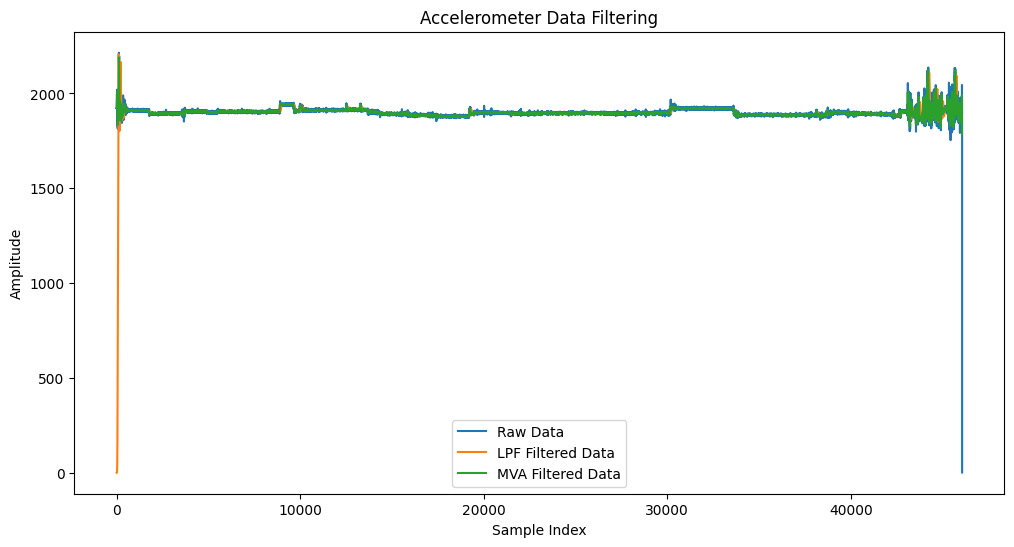

In [8]:
# Data Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(raw_data, label='Raw Data')
plt.plot(lpf_filtered_data, label='LPF Filtered Data')
plt.plot(mva_filtered_data, label='MVA Filtered Data')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Accelerometer Data Filtering')
plt.show()